In [1]:
import sys
import os
import subprocess

# Details on CBIS-DDSM
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
from skimage import io
from scipy import ndimage
import tensorflow as tf
from IPython.display import display
import h5py as hdf



/home/hiba/.virtualenvs/cv/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
labels_df = pd.read_csv('data8.csv')
labels_set = set(labels_df)

In [3]:
labels_df.head()

,BI,BII,BIII,BIV,Mass,Calc,Benign,Malign
0,0,1,0,0,0,1,1,0
1,0,1,0,0,0,1,1,0
2,0,1,0,0,0,1,1,0
3,0,1,0,0,0,1,1,0
4,0,1,0,0,0,1,1,0


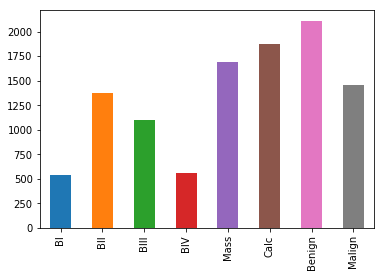

In [4]:
#Labels account
labels_df.sum().plot.bar()

In [7]:
labels_df.sum()

BI         536
BII       1372
BIII      1102
BIV        554
Mass      1694
Calc      1870
Benign    2111
Malign    1453
dtype: int64

,Malign,Benign,Calc,Mass,BIV,BIII,BII,BI
BI,204,332,199,337,0,0,0,536
BII,568,804,616,756,0,0,1372,0
BIII,458,644,654,448,0,1102,0,0
BIV,223,331,401,153,554,0,0,0
Mass,782,912,0,1694,153,448,756,337
Calc,671,1199,1870,0,401,654,616,199
Benign,0,2111,1199,912,331,644,804,332
Malign,1453,0,671,782,223,458,568,204


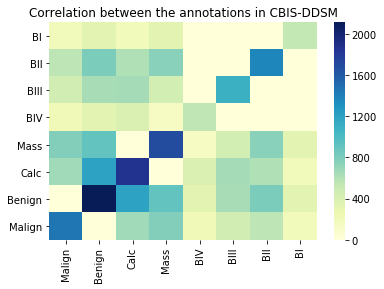

In [7]:
def make_cooccurence_matrix(labels):
    numeric_df = labels; 
    rev_numeric_df= numeric_df [numeric_df.columns[::-1]]
    c_matrix = numeric_df.T.dot(rev_numeric_df)
    ax = plt.axes()
    sns.heatmap(c_matrix, cmap="YlGnBu")
    ax.set_title('Correlation between the annotations in CBIS-DDSM')
    return c_matrix
    
# Compute the co-ocurrence matrix
make_cooccurence_matrix(labels_df)